In [1]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('C:\\Users\Rohan\Documents\BetHistory.csv')
print(data)

    bet_status       date_placed             type  \
0          Win  24/11/2016 17:32           Soccer   
1          Win  24/11/2016 17:31           Soccer   
2         Lose  24/11/2016 17:31           Soccer   
3         Lose  24/11/2016 17:31           Soccer   
4         Lose  24/11/2016 17:31           Soccer   
5         Lose  24/11/2016 17:31           Soccer   
6         Lose  24/11/2016 17:31           Soccer   
7         Lose  24/11/2016 17:31           Soccer   
8          Win  24/11/2016 17:31           Soccer   
9         Lose  23/11/2016 18:04           Soccer   
10        Lose  23/11/2016 18:03           Soccer   
11        Lose  23/11/2016 18:03           Soccer   
12        Lose  23/11/2016 18:03           Soccer   
13         Win  23/11/2016 18:03           Soccer   
14        Lose  22/11/2016 16:43           Soccer   
15        Lose  22/11/2016 16:43           Soccer   
16        Lose  22/11/2016 16:43           Soccer   
17        Lose  22/11/2016 16:43           Soc

In [2]:
data = data.fillna('')
data.head()
# sample rows data.sample(n=5)

,bet_status,date_placed,type,bet_details,price,odds,stake,return,bet_id,bet_type,number_of_lines,stake_per_line,percentage,channel,bonus_bets_redeemed,Account No 137254651|AUD|All Dates|Item Count 432|Bet History All bets|
0,Win,24/11/2016 17:32,Soccer,Multibet (Trebles),2.54,2.54,3.0,7.64,O/1945704/0000432/D,Multibet,1,3.0,,SB Internet,0,
1,Win,24/11/2016 17:31,Soccer,Ajax v Panathinaikos / Win-Draw-Win / Ajax @ 1.73,1.73 (Win),1.73,3.0,5.19,O/1945704/0000431/D,Single,1,3.0,,SB Internet,0,
2,Lose,24/11/2016 17:31,Soccer,Celta Vigo v Standard Liege / Win-Draw-Win / C...,1.61 (Win),1.61,3.0,0.00,O/1945704/0000430/D,Single,1,3.0,,SB Internet,0,
3,Lose,24/11/2016 17:31,Soccer,Schalke 04 v Nice / Win-Draw-Win / Draw @ 3.50,3.50 (Win),3.5,3.0,0.00,O/1945704/0000429/D,Single,1,3.0,,SB Internet,0,
4,Lose,24/11/2016 17:31,Soccer,Fiorentina v PAOK / Win-Draw-Win / Fiorentina ...,1.61 (Win),1.61,3.0,0.00,O/1945704/0000428/D,Single,1,3.0,,SB Internet,0,


In [3]:
#add index and remove other sports
data = data[['bet_status', 'date_placed', 'type', 'bet_details', 'odds', 'stake', 'return', 'bet_type']]

index=1
sport_index = (data['type'] == 'Soccer')
soccer_data = data[sport_index]
soccer_data.sample(n=5)

,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type
12,Lose,23/11/2016 18:03,Soccer,Borussia Monchengladbach v Man City / Win-Draw...,1.75,4.0,0.00,Single
205,Win,12/08/2016 17:00,Soccer,Multibet (Doubles),2.08,5.0,10.40,Multibet
395,Lose,11/09/2015 16:15,Soccer,Multibet (4 folds),65.52,2.5,0.00,Multibet
94,Lose,20/10/2016 22:48,Soccer,Konyaspor v Sporting Braga / Win-Draw-Win / Sp...,2.4,3.0,0.00,Single
176,Win,15/09/2016 22:59,Soccer,Anderlecht v FK Gabala / Win-Draw-Win / Anderl...,1.45,5.0,7.25,Single


In [4]:
soccer_data.dtypes

bet_status      object
date_placed     object
type            object
bet_details     object
odds            object
stake          float64
return         float64
bet_type        object
dtype: object

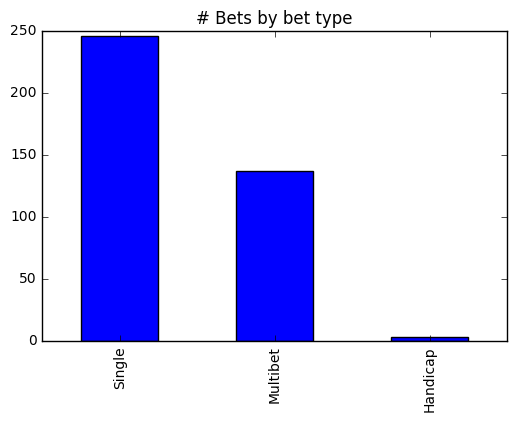

In [5]:
soccer_data['bet_type'].value_counts().plot(kind='bar',title = '# Bets by bet type')

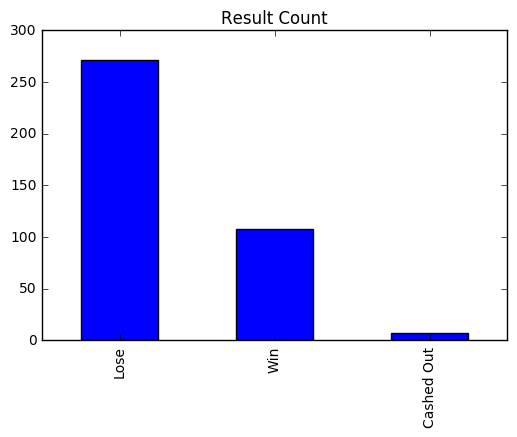

In [6]:
soccer_data['bet_status'].value_counts().plot(kind='bar',title = 'Result Count')

In [7]:
# win rate

lose = soccer_data['bet_status'].value_counts()[0]
win = soccer_data['bet_status'].value_counts()[1]
cashed_out = soccer_data['bet_status'].value_counts()[2]
total_bet_count = lose + win + cashed_out
float(win) / total_bet_count

0.27979274611398963

In [8]:
soccer_data.sort_values(by='odds', ascending=False)[:5]
# soccer_data.sort_values(by='STAKE', ascending=False)[:5]

,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type
380,Lose,25/09/2015 16:33,Soccer,Multibet (5 folds),9.88,5.0,0.00,Multibet
364,Cashed Out,16/10/2015 17:35,Soccer,Multibet (8 folds),9.58,2.5,14.53,Multibet
314,Win,23/02/2016 17:16,Soccer,Arsenal v Barcelona / Correct Score / Barcelon...,9.5,2.0,19.00,Single
60,Lose,2/11/2016 17:34,Soccer,Legia Warsaw v Real Madrid / Correct Score / R...,9.5,1.0,0.00,Single
420,Lose,21/01/2015 17:38,Soccer,Multibet (6 folds),9.39,3.0,0.00,Multibet


In [9]:
soccer_data.sample(n=5)

,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type
2,Lose,24/11/2016 17:31,Soccer,Celta Vigo v Standard Liege / Win-Draw-Win / C...,1.61,3.0,0.0,Single
123,Lose,7/10/2016 17:35,Soccer,Latvia v Faroe Islands / Win-Draw-Win / Latvia...,1.53,2.0,0.0,Single
271,Lose,15/04/2016 17:36,Soccer,West Brom v Watford / Win-Draw-Win / Draw @ 3.10,3.1,5.0,0.0,Single
60,Lose,2/11/2016 17:34,Soccer,Legia Warsaw v Real Madrid / Correct Score / R...,9.5,1.0,0.0,Single
61,Lose,2/11/2016 17:34,Soccer,Legia Warsaw v Real Madrid / Number of Team Go...,1.83,5.0,0.0,Single


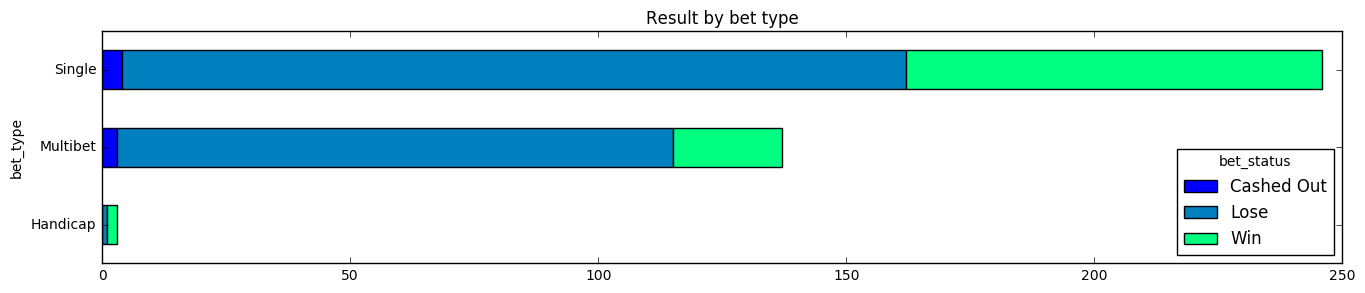

In [10]:
group_by_multi = soccer_data.groupby(['bet_type', 'bet_status'])
result_by_type = group_by_multi.size().unstack()
result_by_type.plot(kind='barh', stacked=True, figsize=[16,3], colormap = 'winter', title = 'Result by bet type')

In [11]:
return_by_bet_type = soccer_data.pivot_table(index='bet_type', columns='bet_status', values='stake', aggfunc='sum')
return_by_bet_type.head()

bet_status,Cashed Out,Lose,Win
bet_type,,,
Handicap,NaN,4.00,10.0
Multibet,12.5,475.36,102.5
Single,13.0,547.29,310.0


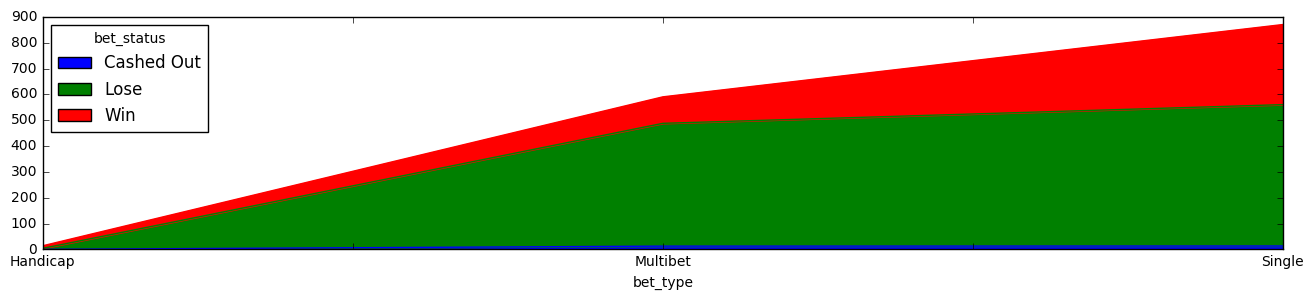

In [12]:
return_by_bet_type.plot(kind='area', stacked=True, figsize=[16,3])

In [13]:
result_by_type = result_by_type.reset_index()
result_by_type[:5]

bet_status,bet_type,Cashed Out,Lose,Win
0,Handicap,NaN,1.0,2.0
1,Multibet,3.0,112.0,22.0
2,Single,4.0,158.0,84.0


In [14]:
result_by_type['win_rate'] = result_by_type['Win'] / (result_by_type['Win'] + result_by_type['Lose'])
result_by_type[:5]

bet_status,bet_type,Cashed Out,Lose,Win,win_rate
0,Handicap,NaN,1.0,2.0,0.666667
1,Multibet,3.0,112.0,22.0,0.164179
2,Single,4.0,158.0,84.0,0.347107


In [15]:
# issues with .loc net_return = soccer_data['stake'] - soccer_data['return']
soccer_data['net_return'] = soccer_data['return'] - soccer_data['stake']
soccer_data[:5]

C:\Users\Rohan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type,net_return
0,Win,24/11/2016 17:32,Soccer,Multibet (Trebles),2.54,3.0,7.64,Multibet,4.64
1,Win,24/11/2016 17:31,Soccer,Ajax v Panathinaikos / Win-Draw-Win / Ajax @ 1.73,1.73,3.0,5.19,Single,2.19
2,Lose,24/11/2016 17:31,Soccer,Celta Vigo v Standard Liege / Win-Draw-Win / C...,1.61,3.0,0.00,Single,-3.00
3,Lose,24/11/2016 17:31,Soccer,Schalke 04 v Nice / Win-Draw-Win / Draw @ 3.50,3.5,3.0,0.00,Single,-3.00
4,Lose,24/11/2016 17:31,Soccer,Fiorentina v PAOK / Win-Draw-Win / Fiorentina ...,1.61,3.0,0.00,Single,-3.00


In [16]:
#stacked bar of wins and losses by month

In [17]:
soccer_data.sample(n=5)

,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type,net_return
341,Lose,20/11/2015 17:30,Soccer,Multibet (Trebles),4.58,5.0,0.00,Multibet,-5.00
195,Lose,5/09/2016 16:09,Soccer,Multibet (Trebles),3.13,5.0,0.00,Multibet,-5.00
254,Win,29/04/2016 16:33,Soccer,Stoke v Sunderland / Win-Draw-Win / Draw @ 3.30,3.3,5.0,16.50,Single,11.50
53,Win,3/11/2016 17:27,Soccer,FK Gabala v Saint-Etienne / Win-Draw-Win / Sai...,1.8,3.5,6.30,Single,2.80
0,Win,24/11/2016 17:32,Soccer,Multibet (Trebles),2.54,3.0,7.64,Multibet,4.64


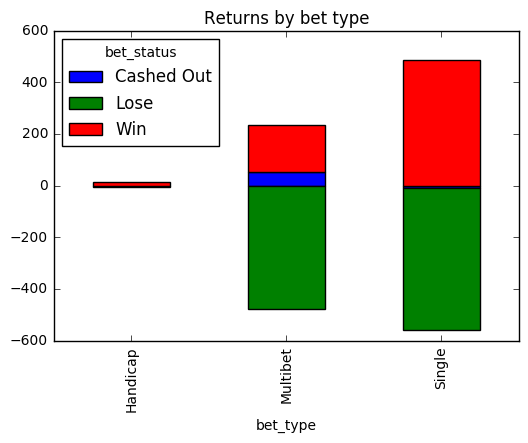

In [18]:
net_return_by_bet_type = soccer_data.pivot_table(index='bet_type', columns= 'bet_status', values='net_return', aggfunc='sum')
net_return_by_bet_type.head()
net_return_by_bet_type.plot(kind='bar', stacked=True, title='Returns by bet type')

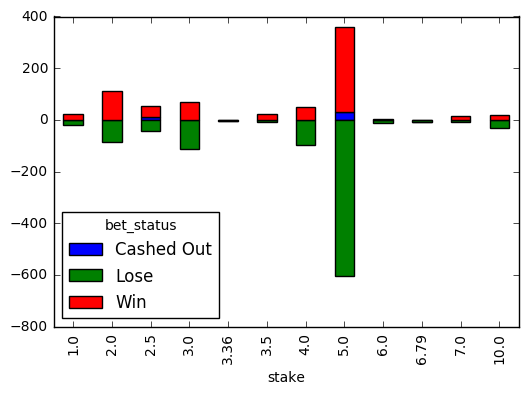

In [19]:
net_returns_by_stake = soccer_data.pivot_table(index='stake',columns='bet_status', values='net_return', aggfunc='sum')
net_returns_by_stake.head()
net_returns_by_stake.plot(kind='bar', stacked=True)

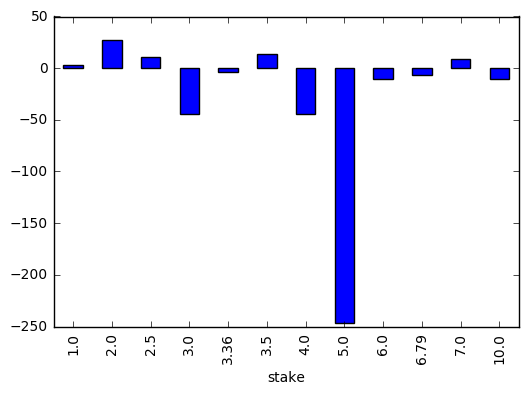

In [20]:
net_return_by_stake = soccer_data.pivot_table(index='stake', values='net_return', aggfunc='sum')
net_return_by_stake.plot(kind='bar')

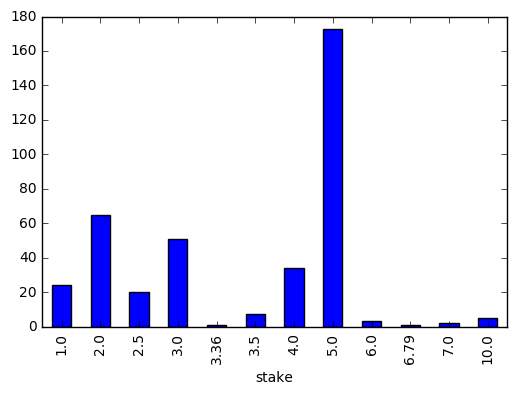

In [21]:
bet_count_by_stake = soccer_data.pivot_table(index='stake', values='net_return', aggfunc='count')
bet_count_by_stake.plot(kind='bar')

In [22]:
soccer_data['net_return'].describe()

count    386.000000
mean      -0.784560
std        5.835099
min      -10.000000
25%       -5.000000
50%       -3.000000
75%        1.960000
max       34.020000
Name: net_return, dtype: float64

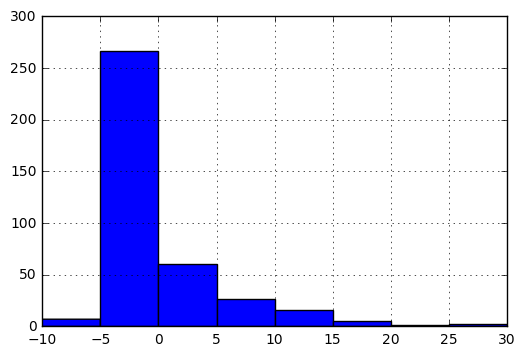

In [23]:
bin_values = np.arange(start=-10, stop=35, step=5)
soccer_data['net_return'].hist(bins=bin_values)

bet_type
Handicap    Axes(0.125,0.125;0.775x0.775)
Multibet    Axes(0.125,0.125;0.775x0.775)
Single      Axes(0.125,0.125;0.775x0.775)
Name: net_return, dtype: object

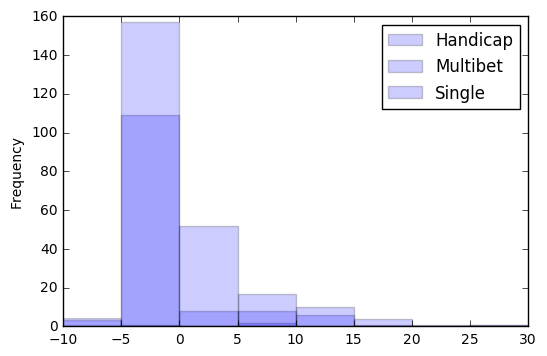

In [24]:
stacked = soccer_data.groupby('bet_type')['net_return']
# stacked.describe()
stacked.plot(kind='hist', bins=bin_values, alpha=.2, colormap='winter', legend=True)

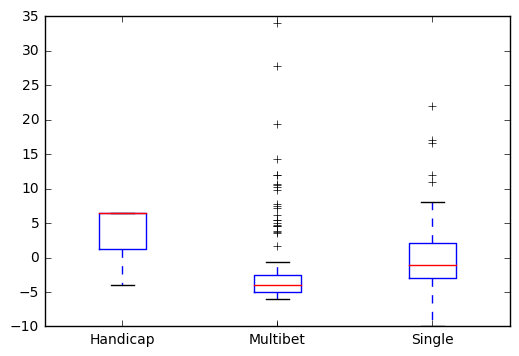

In [25]:
df_bet_type = soccer_data.pivot_table(index='date_placed', columns='bet_type', values='net_return')
df_bet_type.plot(kind='box')

bet_type
Handicap    Axes(0.125,0.125;0.775x0.775)
Multibet    Axes(0.125,0.125;0.775x0.775)
Single      Axes(0.125,0.125;0.775x0.775)
Name: net_return, dtype: object

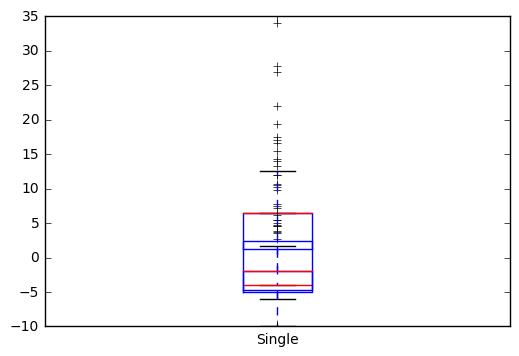

In [26]:
stacked.plot(kind='box')

In [27]:
dfa = soccer_data
dfa['date_placed'] = pd.to_datetime(dfa['date_placed'])
#dfa.sample(n=5)
#dfa.dtypes
dfa['cum_return'] = dfa.net_return.cumsum()
dfa.sample(n=5)

C:\Users\Rohan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Rohan\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,bet_status,date_placed,type,bet_details,odds,stake,return,bet_type,net_return,cum_return
7,Lose,2016-11-24 17:31:00,Soccer,Man Utd v Feyenoord / Win-Draw-Win / Draw @ 5.00,5,3.0,0.00,Single,-3.00,-11.17
101,Win,2016-10-19 18:01:00,Soccer,FK Rostov v Atletico Madrid / Anytime Goalscor...,3.25,1.0,3.25,Single,2.25,-36.31
236,Lose,2016-05-20 16:49:00,Soccer,Crystal Palace v Man Utd / Timecast / Man Utd ...,3.06,5.0,0.00,Single,-5.00,-101.84
212,Lose,2016-06-16 17:31:00,Soccer,Multibet (Doubles),2.87,5.0,0.00,Multibet,-5.00,-110.31
125,Lose,2016-07-10 17:35:00,Soccer,Azerbaijan v Norway / Win-Draw-Win / Norway @ ...,1.83,2.0,0.00,Single,-2.00,-28.12


In [28]:
dfa = dfa[['date_placed','cum_return']]
# dfa.index = dfa['date_placed']
dfa
#dfa.plot(kind='line',figsize=[16,5])

,date_placed,cum_return
0,2016-11-24 17:32:00,4.64
1,2016-11-24 17:31:00,6.83
2,2016-11-24 17:31:00,3.83
3,2016-11-24 17:31:00,0.83
4,2016-11-24 17:31:00,-2.17
5,2016-11-24 17:31:00,-5.17
6,2016-11-24 17:31:00,-8.17
7,2016-11-24 17:31:00,-11.17
8,2016-11-24 17:31:00,-9.85
9,2016-11-23 18:04:00,-14.85


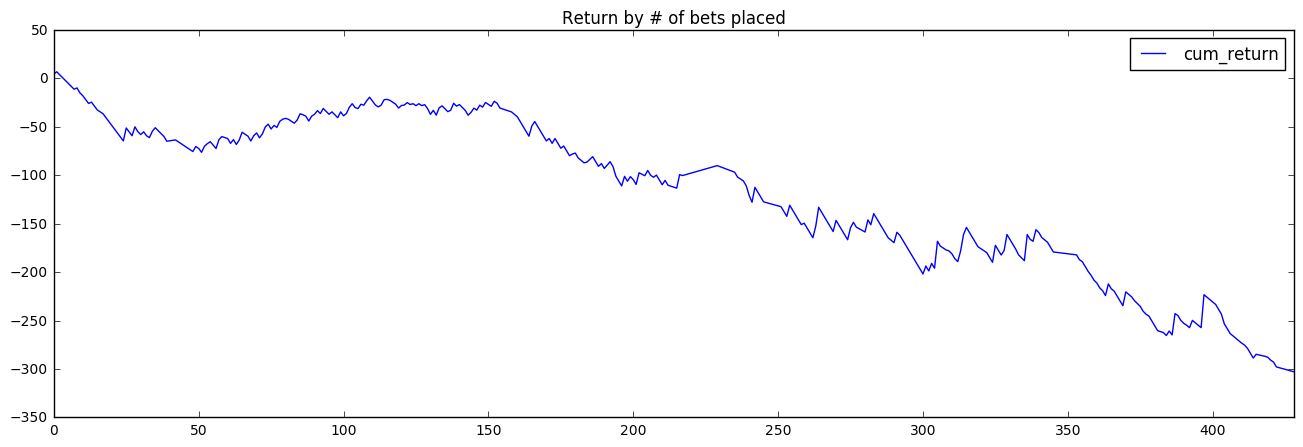

In [31]:
dfa.plot(kind='line',figsize=[16,5], title="Return by # of bets placed")

In [30]:
test_string = 'The word "python" usually refers to a snake'
print(test_string)

The word "python" usually refers to a snake
